# Projeto 8

## Importando bibliotecas e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

### Pré processamento dos dados

Podem haver erros nos conjuntos de dados, por isso vamos verificar se algo precisa ser feito antes de começar a trabalhar nos dados.

#### Hyphoteses

In [3]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Na tabela Hypotheses temos as seguintes colunas:

- `Hypotheses` — breves descrições das hipóteses
- `Reach` — alcance do usuário, em uma escala de um a dez
- `Impact` — impacto nos usuários, em uma escala de um a dez
- `Confidence` — confiança na hipótese, em uma escala de um a dez
- `Effort` — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.

In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Para ter uma melhor padronização das análises, vamos passar os nomes das colunas para lower case.

In [6]:
hypotheses.columns = hypotheses.columns.str.lower()

In [7]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Na tabela o nome da coluna que apresenta as hipóteses se chama "hypothesis", com "i", é apenas a forma singular de "hypotheses", mas para evitar confusões vamos alterar o nome dessa coluna.

In [8]:
hypotheses.rename(columns={'hypothesis': 'hypotheses'}, inplace=True)

Agora checamos por valores duplicados e valores ausentes.

In [9]:
hypotheses.duplicated().sum()

0

In [10]:
hypotheses.isna().sum()

hypotheses    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

Nada por aqui, vamos seguir.

#### Orders

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Na tabela Orders temos as seguintes informações:

- `transactionId` — identificador do pedido
- `visitorId` — identificador do usuário que fez o pedido
- `date` — data do pedido
- `revenue` — receita do pedido
- `group` — o grupo de teste A/B ao qual o usuário pertence

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


Agora vamos adicionar snake case nos nomes das colunas para melhorar a apresentação dos dados.

In [14]:
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

E precisamos converter os dado para o tipo certo. A coluna "date" para datetime.

In [15]:
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Agora só precisamos checar se existem valores duplicados ou nulos.

In [17]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [18]:
orders.duplicated().sum()

0

Apesar de parecer que não existem valores duplicados, visitantes podem ter entrado no grupo A e B simultaneamente. Vamos verificar se existem visitor_id idênticos nos dois grupos.

In [19]:
visitor_id_A = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitor_id_B = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()

stacked_id = visitor_id_B[visitor_id_B.isin(visitor_id_A)]

print('visitor_id presentes nos dois grupos:', len(stacked_id))

visitor_id presentes nos dois grupos: 58


De fato existem. Vamos remover os IDs que estão nos dois grupos.

In [20]:
orders = orders[~orders['visitor_id'].isin(stacked_id)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Agora tudo parece estar em ordem.

#### Visits

In [21]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Na tabela Visits temos:

- `date` — data
- `group` — grupo de teste A/B
- `visits` — o número de visitas na data especificada para o grupo de teste A/B especificado

In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [23]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Convertendo para o tipo certo:

In [24]:
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d")

Checando por duplicados e nulos:

In [25]:
visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [26]:
visits.duplicated().sum()

0

Parece estar tudo certo. Podemos começar a trabalhar.

## Parte 1: Priorizando Hipóteses

Vamos calcular o valor ICE para cada hipótese e classificá-las em ordem decrescente de prioridade.

In [27]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [28]:
sorted_hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)
sorted_hypotheses_ice[['hypotheses', 'ICE']]

,hypotheses,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Vamos calcular o valor RICE para cada hipótese e classificá-las em ordem decrescente de prioridade.

In [29]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [30]:
sorted_hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)
sorted_hypotheses_rice[['hypotheses', 'RICE']]

,hypotheses,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Agora, vamos comparar as prioridades obtidas pelos dois métodos.

In [31]:
comparison = pd.merge(sorted_hypotheses_ice[['hypotheses', 'ICE']], sorted_hypotheses_rice[['hypotheses', 'RICE']], on='hypotheses', suffixes=('_ICE', '_RICE'))

In [32]:
comparison

,hypotheses,ICE,RICE
0,Launch a promotion that gives users discounts ...,16.200000,16.2
1,Add two new channels for attracting traffic. T...,13.333333,40.0
2,Add a subscription form to all the main pages....,11.200000,112.0
3,Show banners with current offers and sales on ...,8.000000,40.0
4,Add product recommendation blocks to the store...,7.000000,56.0
5,Launch your own delivery service. This will sh...,2.000000,4.0
6,Add a customer review page. This will increase...,1.333333,4.0
7,Change the category structure. This will incre...,1.125000,9.0
8,Change the background color on the main page. ...,1.000000,3.0


Ao analisarmos as alterações nas prioridades ao usar RICE em vez de ICE, observamos que o RICE leva em consideração o alcance (Reach) da hipótese. Isso significa que uma hipótese com alto alcance pode ter uma prioridade maior, mesmo que seu impacto, confiança e esforço sejam menores.

A principal diferença entre RICE e ICE está no fator de alcance (Reach). Quando uma hipótese possui um alcance significativo, isso implica que sua influência se estende a um grande número de usuários, tornando-se um elemento crucial na priorização, especialmente quando o objetivo é atingir uma audiência ampla.

## Parte 2: Análise de teste A/B

As tabelas Orders e Visits possuem os resultados do teste A/B.

- **Análise do teste A/B:**

### Gráfico da receita acumulada por grupo.

Vamos construir um vetor com valores de pares unívocos de grupos de datas usando o método drop_duplicates():

In [33]:
datesGroups = orders[['date','group']].drop_duplicates()

Vamos coletar os dados diários cumulativos de pedidos:

In [34]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Temos os resultados de nosso teste todos os dias até a data corrente e armazenamos nas linhas da tabela ordersAggregated.

Vamos fazer algo similar para obter os dados diários agregados cumulativos sobre os visitantes:

In [35]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

Vamos juntar as duas tabelas em uma e dar nomes descritivos às suas colunas:

In [36]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

In [37]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


Temos uma tabela com os dados que precisamos, agora vamos construir um gráfico da receita acumulada por grupo.

DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo A:

In [38]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo B:

In [39]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

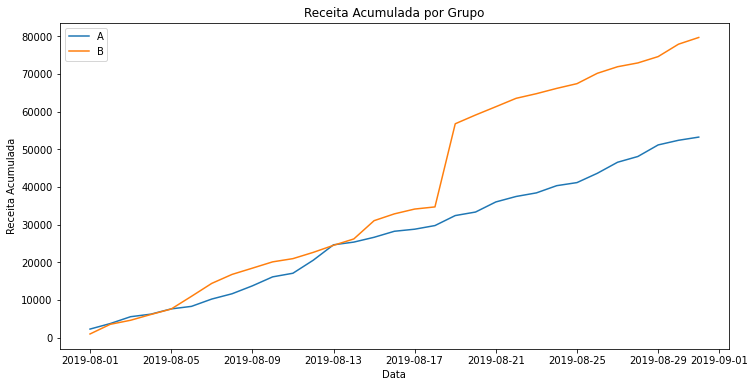

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()

Ao analisar a receita acumulada por grupo, observamos uma tendência positiva nos dois grupos, porém o Grupo B tem uma tendência mais forte em comparação com o Grupo A, ao longo do tempo. Porém, o Grupo B apresentou maior instabilidade apesar de ter uma receita maior que a do Grupo A

No entanto, a existência de flutuações pontuais sugere a possibilidade de eventos ou condições específicas que podem ter impactado temporariamente a receita. A disparidade notável entre os grupos indica a necessidade de uma investigação mais aprofundada para compreender as razões por trás dessas diferenças e determinar se são estatisticamente significativas.

### Gráfico do tamanho médio acumulado do pedido por grupo.

Vamos construir o volume médio de compra por grupo. Vamos dividir a receita cumulativa pela quantidade cumulativa de pedidos:

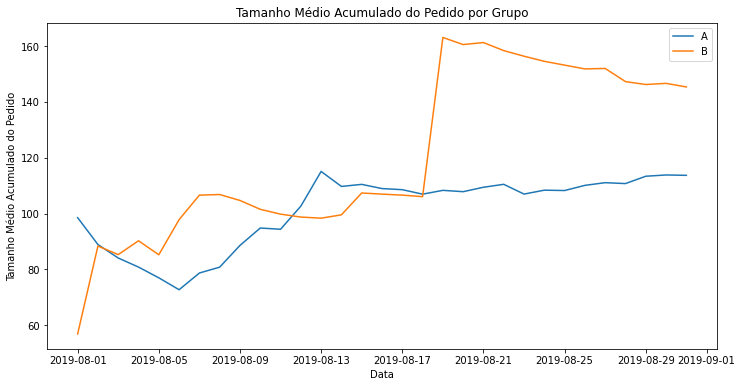

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.legend()

A avaliação do tamanho médio acumulado dos pedidos evidencia distinções significativas entre os grupos A e B. Essas oscilações sinalizam possíveis alterações nos padrões de compra dos usuários, as quais podem ser moldadas por influências como promoções específicas ou ajustes nas estratégias de precificação. 

Vamos precisar de mais dados para descobrir a o verdadeiro volume médio de compra.

### Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em relação a A

In [42]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


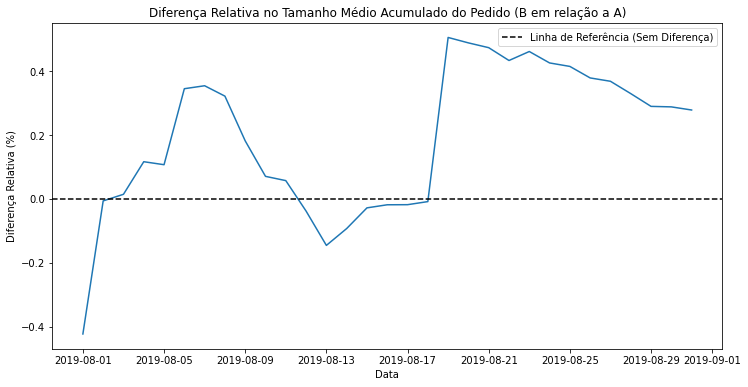

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])- 1,)
plt.axhline(y=0, color='black', linestyle='--', label='Linha de Referência (Sem Diferença)')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (B em relação a A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.legend()
plt.show()

Notamos que a linha de diferença apresenta flutuações ao longo do tempo. Essas variações indicam que as alterações implementadas no grupo B podem ter impactos dinâmicos no tamanho médio dos pedidos em comparação com o grupo A. Talvez elas estejam relacionadas a pedidos muito maiores que o padrão.


### taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia

Vamos adicionar a coluna 'conversion' em cumulativeData. Essa coluna contém a razão entre a quantidade de pedidos e a quantidade de usuários para um grupo específico em uma data específica.

In [44]:
cumulativeData['conversion'] = (cumulativeData['orders']/cumulativeData['visits'])

In [45]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

In [46]:
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [47]:
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visits,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


(18109.0, 18140.0, 0.0, 0.05)

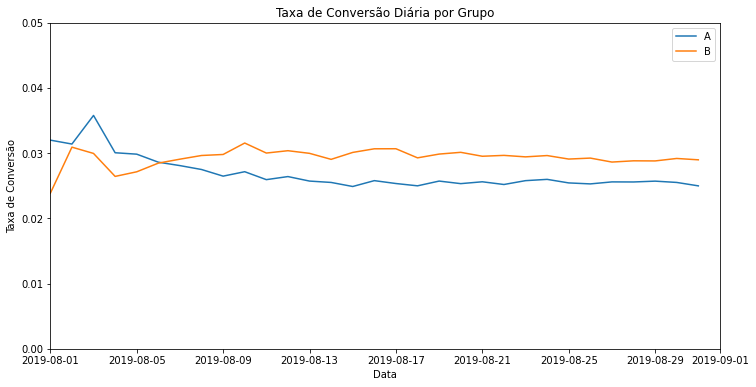

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0, 0.05])

No começo do teste, o segmento A apresentou uma crescente na taxa de conversão, mas o segmento B gradualmente cresceu e se estabilizou em um valor praticamente estável e maior do que A, enquanto A caiu antes de se estabilizar. Uma taxa de conversão consistentemente superior no grupo B pode sugerir uma resposta positiva às mudanças implementadas no grupo B.

Modificamos a escala do gráfico para destacar que a da flutuação no início e no final do teste não era tão alta: representando uma variação relativa entre 2% e 4%, esse valor seria praticamente o dobro em termos absolutos. Portanto, ao remover as escalas dos eixos, a percepção visual poderia sugerir que os valores continuam oscilando e que a taxa de conversão ainda não atingiu uma estabilidade perceptível.

### Diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A

In [49]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']],left_on='date',right_on='date',how='left',suffixes=['A', 'B'],)

(18109.0, 18140.0, -0.5, 0.5)

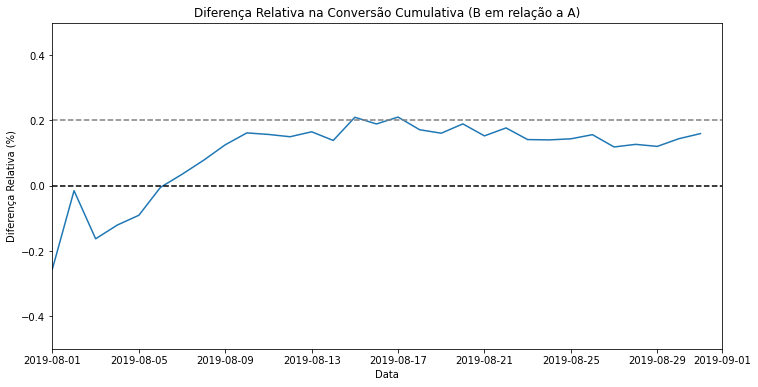

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']- 1,)
plt.title('Diferença Relativa na Conversão Cumulativa (B em relação a A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])

O grupo B teve um pico na taxa de conversão, mas começou a cair ainda no início da análise e em seguida voltou a subir. Se estabilizando próximo a 1% acima do grupo A, o que pode indicar que as mudanças no grupo B atingiram um estado mais consistente em relação ao grupo A.

### Percentis 95 e 99 para o número de pedidos por usuário

Primeiro vamos descobrir a quantidade de transações por usuário.

In [51]:
orders_per_users = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_per_users.sort_values(by='transaction_id', ascending=False).head(10)

,visitor_id,transaction_id
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0, 0.5, 'Usuários')

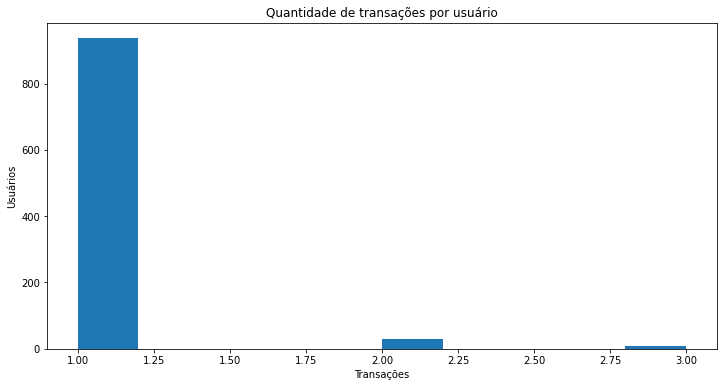

In [52]:
plt.figure(figsize=(12, 6))
plt.hist(orders_per_users['transaction_id'])
plt.title('Quantidade de transações por usuário')
plt.xlabel('Transações')
plt.ylabel('Usuários')

Com esse gráfico fica claro que muitos usuários fazem apenas um pedido, mas não fica claro quantos realizaram dois, três ou mais pedidos. Precisamos de outro tipo de gráfico.

Text(0, 0.5, 'Usuários')

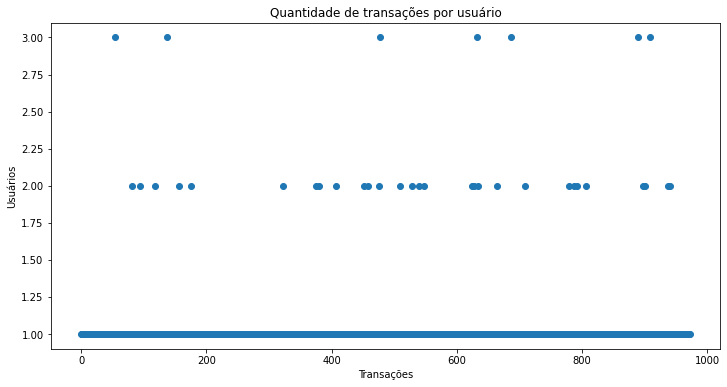

In [53]:
plt.figure(figsize=(12, 6))
x_values = pd.Series(range(0, len(orders_per_users)))
plt.scatter(x_values, orders_per_users['transaction_id']) 
plt.title('Quantidade de transações por usuário')
plt.xlabel('Transações')
plt.ylabel('Usuários')

Existem poucos registros de usuários com mais de 1 pedidos, casos como esses podem ser considerados anomalias.

Agora vamos calcular os percentis 95 e 99

In [54]:
np.percentile(orders_per_users['transaction_id'], [95, 99])

array([1., 2.])

Menos de 5% dos usuários fez mais do que 1 pedido e menos de 1% fez mais do que 2 pedidos. Os usuários acima do percentil 95 podem ser considerados como potenciais outliers ou comportamentos anômalos. Usuários que fazem muitos pedidos inflam o numerador quando calculamos a conversão. O comportamento deles provavelmente difere do padrão normal.

### Gráfico de dispersão dos preços dos pedidos


Vamos ver como fica distribuição dos preços.

In [55]:
orders.sort_values(by='revenue',ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A
949,1347999392,887908475,2019-08-21,930.0,A
940,2420050534,4003628586,2019-08-08,905.8,B
613,4071177889,3931967268,2019-08-07,830.3,B


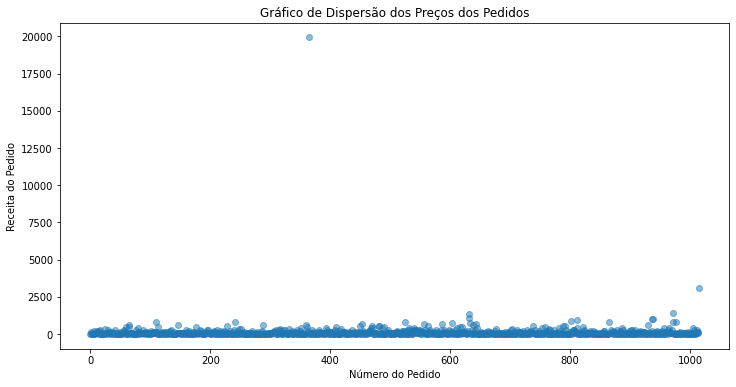

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.5)
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('Número do Pedido')
plt.ylabel('Receita do Pedido')
plt.show()

A maior parte dos pedidos é menor que 2500. Existem pedidos com valores anormais, por exemplo de 20000, que é muito superior aos demais.

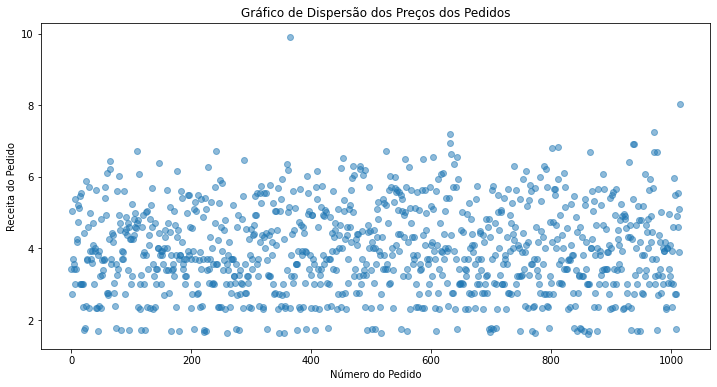

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), np.log(orders['revenue']), alpha=0.5)
plt.title('Gráfico de Dispersão dos Preços dos Pedidos')
plt.xlabel('Número do Pedido')
plt.ylabel('Receita do Pedido')
plt.show()

### Percentis 95 e 99 dos preços dos pedidos

In [58]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Menos de 5% dos usuários fizeram pedidos acima de 414.27 e menos de 1% dos usuários gastaram mais do que 830.30. Os pedidos acima do percentil 95 podem ser considerados como potenciais outliers ou anomalias devido a valores extremos.

### Significância estatística da diferença na conversão entre os grupos usando os dados brutos

Vamos criar, primeiramente, as variáveis orders_by_users_A e orders_by_users_B com as colunas ['userId', 'orders'], nas quais a quantidade de pedidos por usuários com pelo menos um pedido será especificada.

In [59]:
orders_by_users_A = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_A.columns = ['visitor_id', 'orders']

In [60]:
orders_by_users_B = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_B.columns = ['visitor_id', 'orders']

Vamos declarar as variáveis sampleA e sampleB, com usuários que realizaram pedidos e a quantidade de pedidos correspondente. Usuários sem pedidos terão 0.

In [61]:
sample_A = (pd.concat([orders_by_users_A['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0))

In [62]:
sample_B = (pd.concat([orders_by_users_B['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0))

Para calcular a significância estatística da diferença de conversão com base nos resultados obtidos após duas semanas de testes, vamos aplicar o teste Mann-Whitney.

Também é importante definirmos as hipóteses que serão testadas:

- **Hipótese Nula (H0)**: Não há diferença significativa na taxa de conversão entre os grupos A e B.

- **Hipótese Alternativa (H1)**: Há uma diferença significativa na taxa de conversão entre os grupos A e B.

In [63]:
alpha = 0.05
results = st.mannwhitneyu(sample_A, sample_B)
print('p-value: ', results.pvalue.round(3))

if (results.pvalue < alpha):
    print('Conclusão: A diferença na conversão entre os grupos é estatisticamente significativa.')
else:
    print('Conclusão: Não há evidências estatísticas de diferença significativa na conversão entre os grupos.')
    
print('Ganho de conversão relativo para o grupo B: ','{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

p-value:  0.011
Conclusão: A diferença na conversão entre os grupos é estatisticamente significativa.
Ganho de conversão relativo para o grupo B:  0.160


Ao analisarmos os dados brutos, evidenciamos uma disparidade significativa entre os grupos A e B. O valor p resultante, que é 0,011, situa-se abaixo do limiar comumente aceito de 0,05. Isso nos conduz à rejeição da hipótese nula, indicando de maneira robusta uma diferença estatisticamente significativa na conversão entre os dois grupos. Além disso, a inclinação relativa do grupo B, destacada como 16% na última linha dos resultados, sublinha a magnitude dessa discrepância na eficácia das variantes testadas.

### Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos

Vamos calcular a significância estatística da diferença do volume médio de pedidos entre os grupos.

- **Hipótese Nula (H0)**: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B.

- **Hipótese Alternativa (H1)**: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B.

In [64]:
results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], 
                            orders[orders['group'] == 'B']['revenue'])
print('p-value: ', results.pvalue.round(3))
alpha = 0.05

if (results.pvalue < alpha):
    print('Conclusão: A diferença no tamanho médio do pedido entre os grupos é estatisticamente significativa.')
else:
    print('Conclusão: Não há evidências estatísticas de diferença significativa no tamanho médio do pedido entre os grupos.')
    
print('Ganho relativo no tamanho do pedido para o grupo B: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / 
                                                                orders[orders['group']=='A']['revenue'].mean() - 1))

p-value:  0.862
Conclusão: Não há evidências estatísticas de diferença significativa no tamanho médio do pedido entre os grupos.
Ganho relativo no tamanho do pedido para o grupo B:  0.278


O valor p é consideravelmente maior que 0,05, indicando que não temos evidências suficientes para rejeitar a hipótese nula. Dessa forma, não podemos concluir que há uma diferença estatisticamente significativa no tamanho médio do pedido entre os grupos. Entretanto, é importante notar que, na prática, o tamanho médio dos pedidos no grupo B é significativamente maior em comparação com o grupo A.

### Significância estatística da diferença na conversão entre os grupos usando os dados filtrados.

Vamos considerar como usuários anômalos aqueles que realizaram mais do que um pedido, ou que fizeram um com valor superior a 414, como foi visto anteriormente no calculo dos percentis 95 e 99. Para isso, precisamos remover 5% dos usuários com a maior quantidade de pedidos e entre 1% e 5% dos pedidos mais caros. 

In [65]:
users_with_many_orders = (pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 1]['visitor_id'], orders_by_users_B[orders_by_users_B['orders'] > 1]['visitor_id']], axis = 0))

print('Usuários com um pedido superior a 95% dos dados:', len(users_with_many_orders), 'usuários')

Usuários com um pedido superior a 95% dos dados: 36 usuários


In [66]:
users_with_expensive_orders = orders[orders['revenue'] > 414]['visitor_id']

print('Usuários com tamanho de pedido superior a 95% dos dados:', len(users_with_expensive_orders),'usuários')

Usuários com tamanho de pedido superior a 95% dos dados: 51 usuários


In [67]:
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values())

print('No total, temos', len(abnormal_users), 'usuários incomuns')

No total, temos 86 usuários incomuns


Calcularemos a significância estatística das diferenças de conversão entre grupos usando dados filtrados.

In [68]:
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0,)

In [69]:
sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0,)

- **Hipótese Nula (H0)**: Não há diferença significativa na conversão entre os grupos A e B usando os dados filtrados.

- **Hipótese Alternativa (H1)**: Há uma diferença significativa na conversão entre os grupos A e B usando os dados filtrados.

In [70]:
results = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)
print('p-value: ', results.pvalue.round(3))

if (results.pvalue < alpha):
    print('Conclusão: A diferença na conversão entre os grupos, com dados filtrados, é estatisticamente significativa.')
else:
    print('Conclusão: Não há evidências estatísticas de diferença significativa na conversão entre os grupos com dados filtrados.')
    
print('Ganho de conversão relativo para o grupo B em dados filtrados: ','{0:.3f}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-value:  0.016
Conclusão: A diferença na conversão entre os grupos, com dados filtrados, é estatisticamente significativa.
Ganho de conversão relativo para o grupo B em dados filtrados:  0.174


Ainda há uma diferença estatisticamente significativa entre os grupos A e B. O valor p na primeira linha da saída é de 0,016, inferior a 0,05, levando à rejeição da hipótese nula. Isso denota uma diferença estatisticamente relevante na conversão entre os grupos. Ademais, a inclinação relativa do grupo B experimentou um acréscimo de 16% para 17%.

### Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. 

Faremos algo parecido com o que foi feito anteriormente.

In [71]:
filtered_order_A = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [72]:
filtered_order_B = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

- **Hipótese Nula (H0)**: Não há diferença significativa no tamanho médio do pedido entre os grupos A e B usando os dados filtrados.

- **Hipótese Alternativa (H1)**: Há uma diferença significativa no tamanho médio do pedido entre os grupos A e B usando os dados filtrados..

In [73]:
results = st.mannwhitneyu(filtered_order_A, filtered_order_B)
print('p-value: ', results.pvalue.round(3))

if (results.pvalue < alpha):
    print('Conclusão: A diferença no tamanho médio do pedido entre os grupos, com dados filtrados, é estatisticamente significativa.')
else:
    print('Conclusão: Não há evidências estatísticas de diferença significativa no tamanho médio do pedido entre os grupos com dados filtrados.')
    
print('Ganho relativo no tamanho do pedido para o grupo B em dados filtrados: ','{0:.3f}'.format(filtered_order_B.mean() / filtered_order_A.mean() - 1))


p-value:  0.771
Conclusão: Não há evidências estatísticas de diferença significativa no tamanho médio do pedido entre os grupos com dados filtrados.
Ganho relativo no tamanho do pedido para o grupo B em dados filtrados:  -0.033


O valor p diminuiu, resultando em uma diferença entre os segmentos de -3%, em oposição aos 27,8% anteriores. Embora as conclusões gerais deste teste permaneçam consistentes, esse exemplo destaca de maneira evidente como anomalias podem influenciar os resultados dos testes A/B.

### Decisão com base nos resultados do teste. 

As decisões possíveis são: 
1. Pare o teste, considere um dos grupos o líder. 
2. Pare o teste, conclua que não há diferença entre os grupos. 
3. Continue o teste.

Levando em consideração que existe uma diferença estatística significativa na conversão entre os grupos, tanto de acordo com os dados brutos como com os filtrados. E os dados brutos não apresentaram uma diferença estatística significativa entre os grupos, em termos de volume médio de compra. Porém, após remover as anomalias, pode-se observar que houve uma diferença estatística significativa.
O gráfico da diferença de conversão entre os grupos evidencia que os resultados do grupo B são melhores que aqueles no grupo A: eles possuem uma tendência ao crescimento ou a se estabilizarem em torno da média.
O gráfico da diferença no volume médio de compra mostra flutuações: foi esse gráfico que permitiu detectar as anomalias.

Portanto, recomenda-se **parar o teste, e considerar o grupo B como líder.** Visto que a maioria das análises mostram evidências de que o grupo B trouxe melhores resultados.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. Gostei bastante do projeto. Você demonstra boa maturidade.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Uso adequado de funções e recursos (inclusive funções pouco comums como np.logical_and)
- Bons gráficos e análises


Bom trabalho.
</div>